# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid=f6f1a4a12ed512a6a9a90de0f8114b24&unit=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"]

        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ostrovnoy
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hualmay
Processing Record 10 of Set 1 | envira
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | chase
Processing Record 13 of Set 1 | bonavista
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | nagato
Processing Record 16 of Set 1 | plettenberg bay
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 1 

Processing Record 35 of Set 4 | touros
Processing Record 36 of Set 4 | lodwar
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | floro
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | kursumlija
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | sidi ali
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | saskylakh
Processing Record 0 of Set 5 | clyde river
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | mackay
Processing Record 4 of Set 5 | birjand
Processing Record 5 of Set 5 | flin flon
Processing Record 6 of Set 5 | bandarbeyla
Processing Record 7 of Set 5 | sijunjung
Processing Record 8 of Set 5 

Processing Record 23 of Set 8 | nova ushytsya
Processing Record 24 of Set 8 | chiscas
Processing Record 25 of Set 8 | ornskoldsvik
Processing Record 26 of Set 8 | leningradskiy
Processing Record 27 of Set 8 | maniitsoq
Processing Record 28 of Set 8 | havelock
Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | xghajra
City not found. Skipping...
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | marsaxlokk
Processing Record 33 of Set 8 | grand-lahou
Processing Record 34 of Set 8 | antalaha
Processing Record 35 of Set 8 | tashla
Processing Record 36 of Set 8 | begoro
Processing Record 37 of Set 8 | mount gambier
Processing Record 38 of Set 8 | maan
Processing Record 39 of Set 8 | srandakan
Processing Record 40 of Set 8 | mahon
Processing Record 41 of Set 8 | linjiang
Processing Record 42 of Set 8 | moranbah
Processing Record 43 of Set 8 | fare
Processing Record 44 of Set 8 | ko samui
Processing Record 45 of Set 8 | havre-saint-pierre
Proce

KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          395
Lat           395
Lng           395
Max Temp      395
Humidity      395
Cloudiness    395
Wind Speed    395
Country       395
Date          395
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.0531,39.5131,273.24,93,99,8.89,RU,1679206631
1,bluff,-46.6000,168.3333,292.32,70,100,5.26,NZ,1679206439
2,rikitea,-23.1203,-134.9692,299.39,74,11,6.37,PF,1679206633
3,atuona,-9.8000,-139.0333,300.17,71,16,8.20,PF,1679206372
4,avarua,-21.2078,-159.7750,298.18,88,28,2.57,CK,1679206562


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 30, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 30,  edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 30,  edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 30,  edgecolors='black')

# Incorporate the other graph properties
plt.ylim(top=14)
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Add regression line to plot
    plt.plot(x_values, intercept + slope * x_values, 'r')
    
    # Add equation to plot
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(equation, (x_values.min(), y_values.max()), fontsize=12, color='red')
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show plot
    plt.show()
    print(f"The r value is: {r_value}")


In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.0531,39.5131,273.24,93,99,8.89,RU,1679206631
6,hofn,64.2539,-15.2082,270.35,67,74,13.85,IS,1679206447
11,chase,50.8165,-119.6857,276.66,95,59,0.64,CA,1679206645
12,bonavista,48.6499,-53.1147,271.32,98,88,0.45,CA,1679206646
13,nagato,34.3833,131.2000,286.54,52,70,2.86,JP,1679206647


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bluff,-46.6000,168.3333,292.32,70,100,5.26,NZ,1679206439
2,rikitea,-23.1203,-134.9692,299.39,74,11,6.37,PF,1679206633
3,atuona,-9.8000,-139.0333,300.17,71,16,8.20,PF,1679206372
4,avarua,-21.2078,-159.7750,298.18,88,28,2.57,CK,1679206562
5,saint-philippe,-21.3585,55.7679,301.92,75,36,3.20,RE,1679206461


###  Temperature vs. Latitude Linear Regression Plot

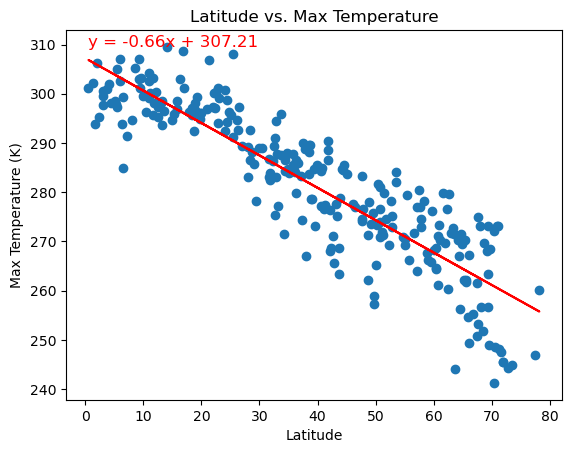

The r value is: -0.889961749391313


In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (K)', 'Latitude vs. Max Temperature')


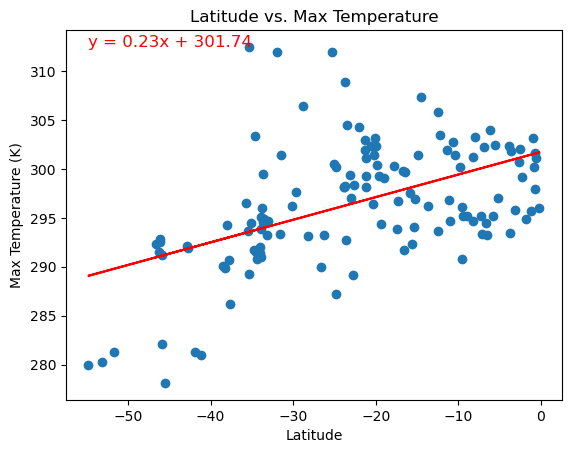

The r value is: 0.5008574175782565


In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (K)', 'Latitude vs. Max Temperature')

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature in the Northern Hemisphere, while there is a moderate positive correlation between the two variables in the Southern Hemisphere. This suggests that as we move towards the poles in the Northern Hemisphere, the temperature tends to decrease, while in the Southern Hemisphere, the temperature tends to increase towards the equator.

### Humidity vs. Latitude Linear Regression Plot

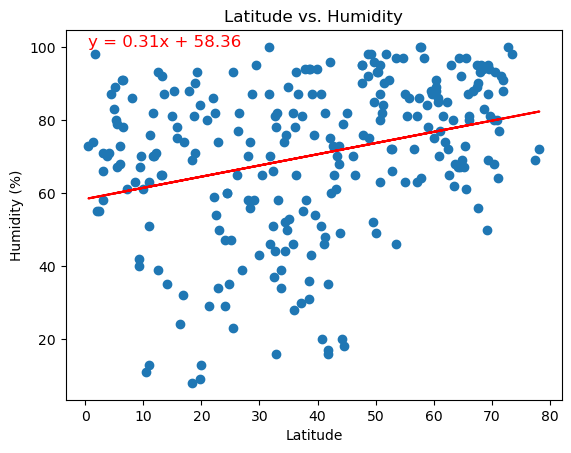

The r value is: 0.29748401123152685


In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity')

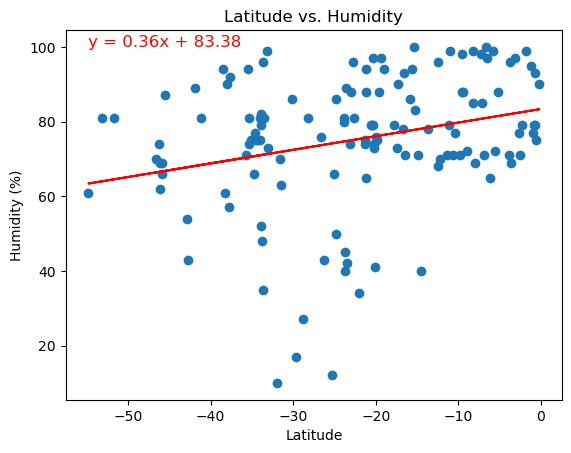

The r value is: 0.27102540445836065


In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity')

**Discussion about the linear relationship:** The linear regression analysis for latitude vs. humidity suggest that there is a weak positive correlation in the Northern Hemisphere, while there is a weak negative correlation in the Southern Hemisphere. This suggests that there is a slight tendency for humidity to increase as we move towards the poles in the Northern Hemisphere, while it tends to decrease in the Southern Hemisphere.



### Cloudiness vs. Latitude Linear Regression Plot

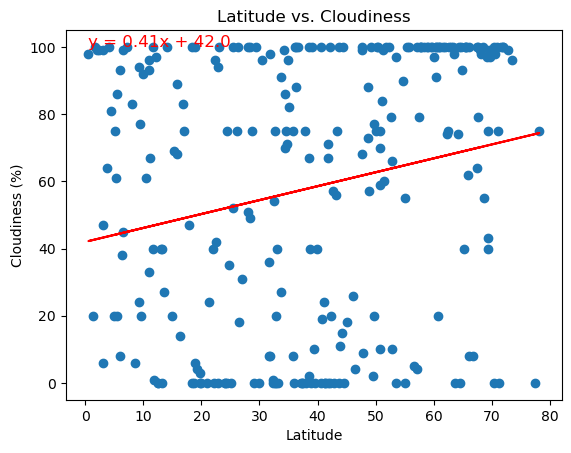

The r value is: 0.21614408438166913


In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Latitude vs. Cloudiness')


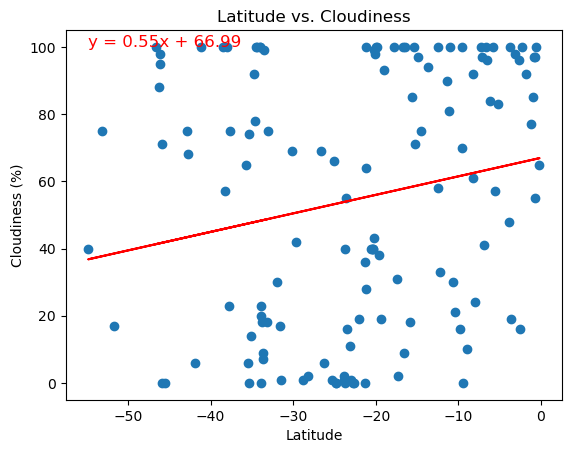

The r value is: 0.19788127615045323


In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Latitude vs. Cloudiness')


**Discussion about the linear relationship:** Comparing the linear regression analysis for latitude vs. cloudiness, we can see that there is a very weak positive correlation in both hemispheres, which suggests that there is no strong relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

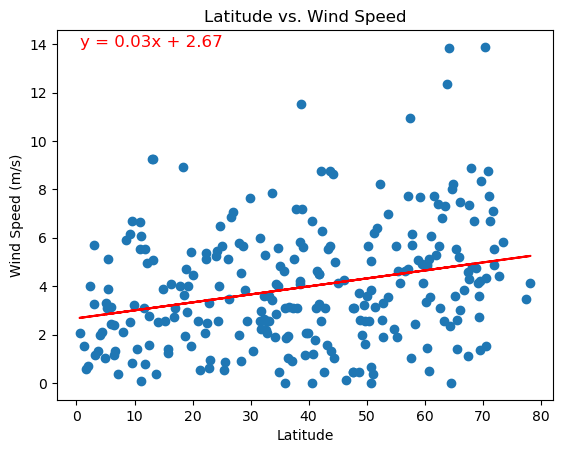

The r value is: 0.2722122614097886


In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs. Wind Speed')

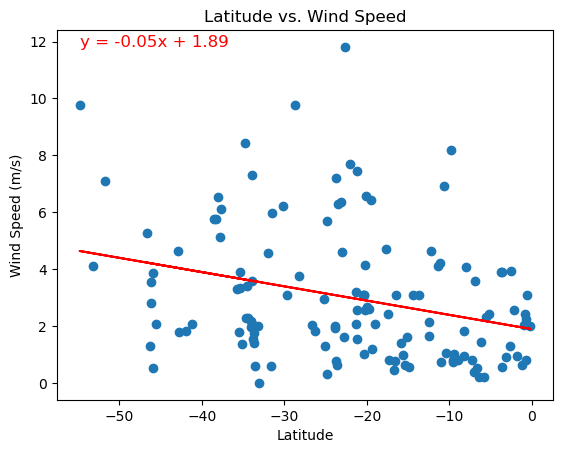

The r value is: -0.2952403414540414


In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs. Wind Speed')

**Discussion about the linear relationship:** Comparing the linear regression analysis for latitude vs. wind speed, we can see that there is a weak positive correlation in the Northern Hemisphere, while there is a weak negative correlation in the Southern Hemisphere. This suggests that the wind speed tends to increase slightly as we move towards the poles in the Northern Hemisphere, while it tends to decrease in the Southern Hemisphere.